<a href="https://colab.research.google.com/github/alexnf8/bactobac/blob/master/DrinkConcentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [12]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
concentration   = np.array([40, 12,  5],  dtype=float)
timetomax = np.array([0.6, 0.9, 1.0],  dtype=float)

for i,c in enumerate(concentration):
  print("{} percent concentration = {} time to max BAC".format(c, timetomax[i]))

l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(concentration, timetomax, epochs=500, verbose=False)
print("Finished training the model")

40.0 percent concentration = 0.6 time to max BAC
12.0 percent concentration = 0.9 time to max BAC
5.0 percent concentration = 1.0 time to max BAC
Finished training the model


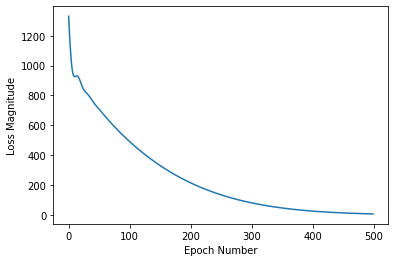

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [15]:
print(model.predict([15]))
print("Model predicts that drinking a standard drink with concentration of 15 will take: {} of an hour to get to max BAC".format(model.predict([15])))

1/1 [==============================] - 0s 43ms/step
[[0.8782313]]
1/1 [==============================] - 0s 43ms/step
Model predicts that drinking a standard drink with concentration of 15 will take: [[0.8782313]] of an hour to get to max BAC


In [11]:
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

These are the l0 variables: [array([[ 0.48300433, -0.38090932, -0.17490208,  0.0851092 ]],
      dtype=float32), array([ 3.9795687 , -3.8035336 ,  0.20639297, -2.0509617 ], dtype=float32)]
These are the l1 variables: [array([[-0.10453455, -0.10411718, -1.536868  , -1.0026816 ],
       [ 0.71495163,  0.45645925,  1.1617075 ,  0.15683131],
       [-0.9265417 ,  0.5342712 , -0.24647467, -0.35514978],
       [ 0.15283939, -0.29562798,  0.7388496 ,  0.6099331 ]],
      dtype=float32), array([-1.6542234, -3.5382419, -4.229889 , -2.6144059], dtype=float32)]
These are the l2 variables: [array([[-0.04919645],
       [-0.6698495 ],
       [-1.260377  ],
       [-0.46824396]], dtype=float32), array([3.7865653], dtype=float32)]
